# Inicializacion de todos los datos

In [27]:
import os
import cv2
import numpy as np
import shutil
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
# Función para cargar y etiquetar imágenes
from typing import Any


def load_and_label_data(folder, output_folder):
    images = []
    labels = []
    for label, class_folder in enumerate[Any](os.listdir(folder)):
        class_path = os.path.join(folder, class_folder)
        output_class_path = os.path.join(output_folder, class_folder)
        if not os.path.exists(output_class_path):
            os.makedirs(output_class_path)
        print(f"Cargando imágenes de la clase '{class_folder}'...")
        for i, filename in enumerate(os.listdir(class_path)):
            img = cv2.imread(os.path.join(class_path, filename))

            if img is None:
                print(f"  [!] Error: No se pudo leer '{filename}'. Saltando...")
                continue



            if i < 5:
                # Mostrar imágenes originales y redimensionadas
                fig, axes = plt.subplots(1, 2, figsize=(10, 5))
                axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                axes[0].set_title('Imagen original')

            img_resized = cv2.resize(img, (50, 50))  # Redimensionar según sea necesario
            print(f"Procesando imagen: {filename} (Clase: {class_folder})")

            if i < 5:
                # Mostrar imágenes redimensionadas
                axes[1].imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
                axes[1].set_title('Imagen redimensionada')
                plt.show()

            images.append(img_resized)
            labels.append(label)  # Usar el índice de la clase como etiqueta

            # Guardar imágenes redimensionadas en la nueva carpeta
            output_filename = os.path.join(output_class_path, filename)
            cv2.imwrite(output_filename, img_resized)

    print("Carga y etiquetado completados.")
    return np.array(images), np.array(labels)

Cargando imágenes de la clase 'gato'...
Procesando imagen: 10.jpg (Clase: gato)


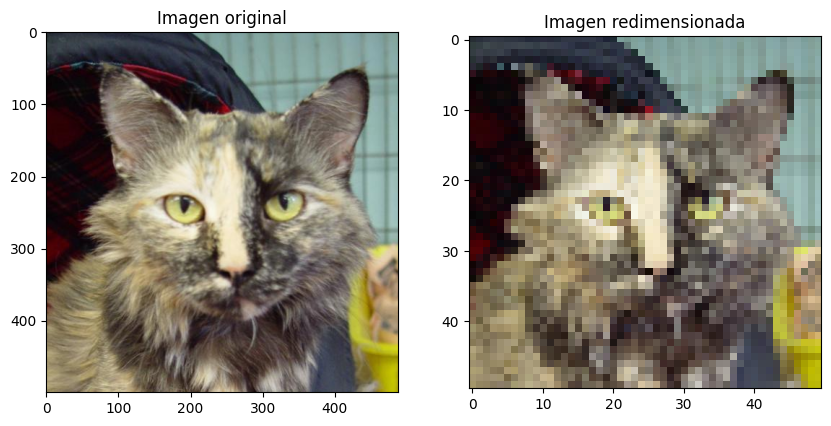

Procesando imagen: cat.4007.jpg (Clase: gato)


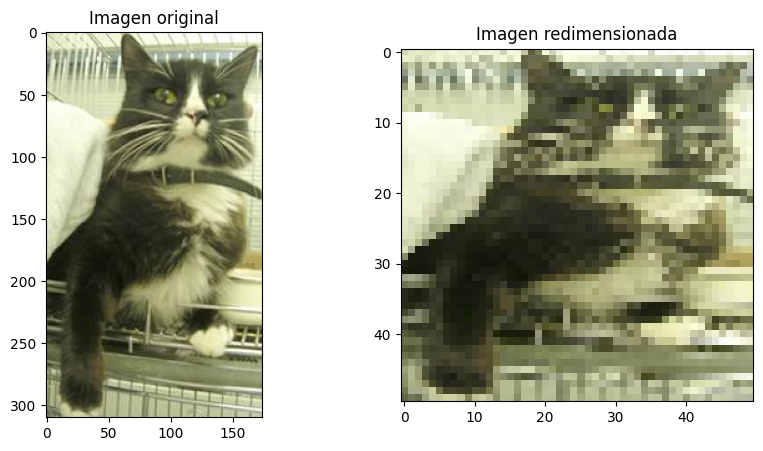

Procesando imagen: closeup-vertical-shot-cute-european-shorthair-cat.jpg (Clase: gato)


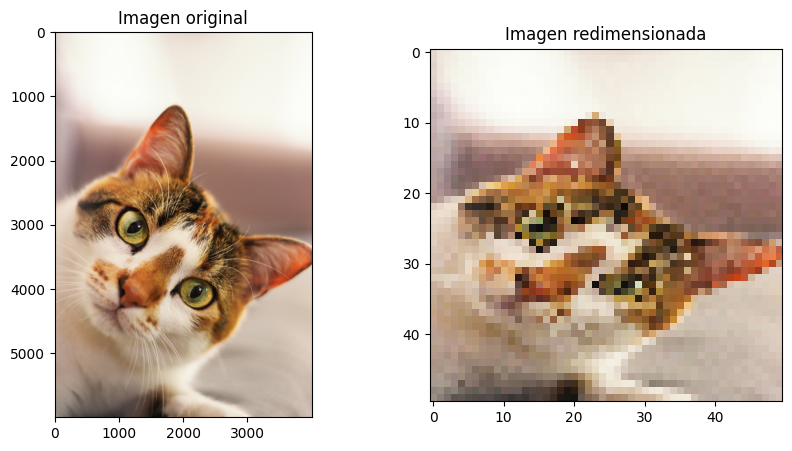

Procesando imagen: cuales-son-razas-gato-mas-caras-del-mundo-872661.jpg (Clase: gato)


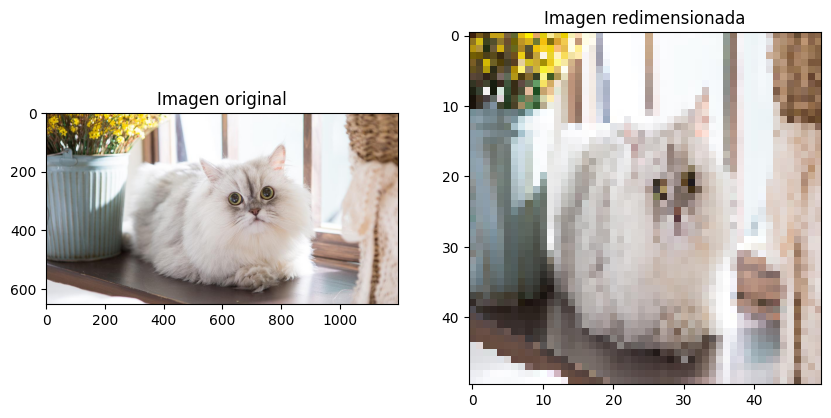

Procesando imagen: Diseno-sin-titulo-26-1.png (Clase: gato)


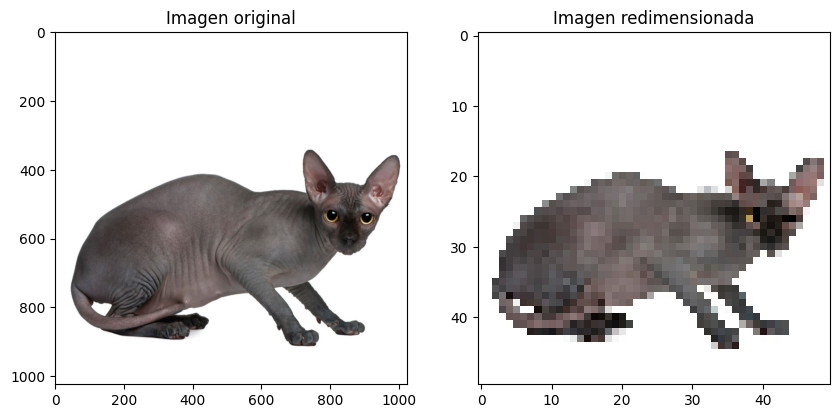

Procesando imagen: el_gato_persa_0323ffdd-8ca6-4757-952d-ffaada1b0c3f.jpg.webp (Clase: gato)
Procesando imagen: Gato 1.jpg (Clase: gato)
Procesando imagen: Gato 2.jpg (Clase: gato)
Procesando imagen: Gato 3.jpg (Clase: gato)
Procesando imagen: Gato 4.jpg (Clase: gato)
Procesando imagen: Gato 5.jpg (Clase: gato)
Procesando imagen: gato-amarillo.png (Clase: gato)
Procesando imagen: gato-bengali-en-tv.jpg (Clase: gato)
  [!] Error: No se pudo leer 'gato-gris-sobre-fondo-blanco_131240-321.jpg'. Saltando...
Procesando imagen: gato-gris.png (Clase: gato)
Procesando imagen: gato-peludo.png (Clase: gato)
Procesando imagen: gato.jpg (Clase: gato)
Procesando imagen: gato1 (1).jpg (Clase: gato)
Procesando imagen: gato1.jpg (Clase: gato)
Procesando imagen: gato2.jpg (Clase: gato)
Procesando imagen: gato3 (1).jpg (Clase: gato)
Procesando imagen: gato3.jpg (Clase: gato)
Procesando imagen: gato4.jpg (Clase: gato)
Procesando imagen: gatoc1.png (Clase: gato)
Procesando imagen: gatoc2.png (Clase: gato)


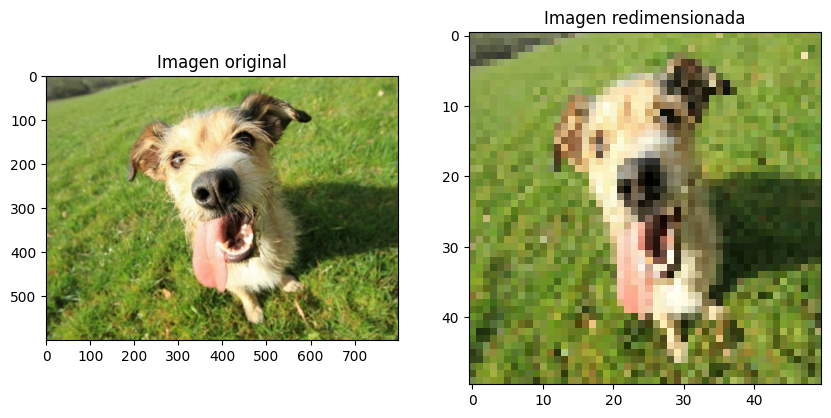

Procesando imagen: alabai-perro.jpg (Clase: perro)


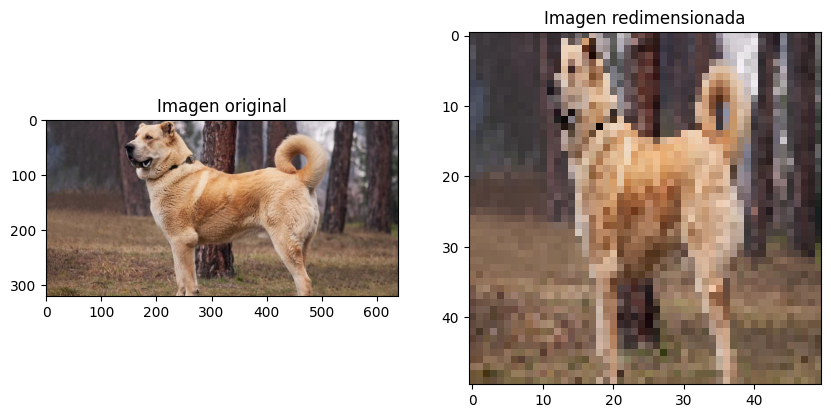

Procesando imagen: alvan-nee-8g0D8ZfFXyA-unsplash.jpg (Clase: perro)


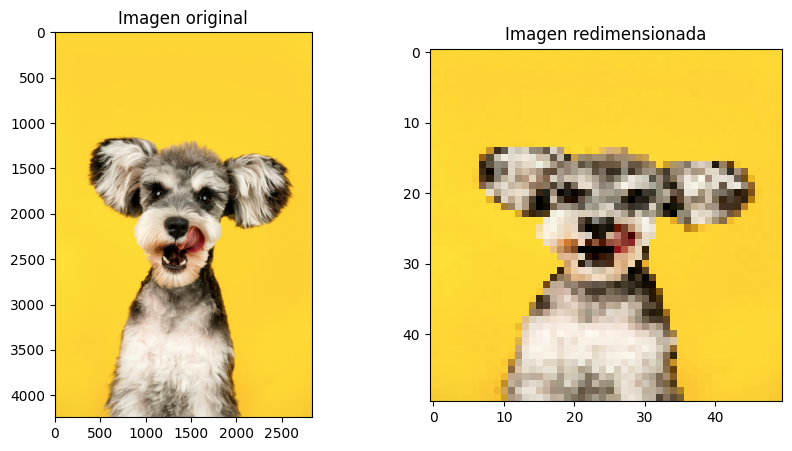

Procesando imagen: alvan-nee-eoqnr8ikwFE-unsplash.jpg (Clase: perro)


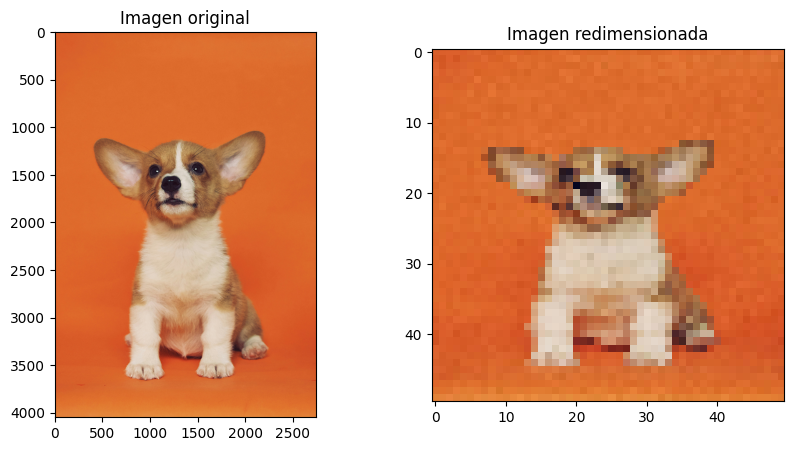

Procesando imagen: cachorro-razas-de-perros-pequenos-y-carinosos-paradispets-800x600.jpg (Clase: perro)


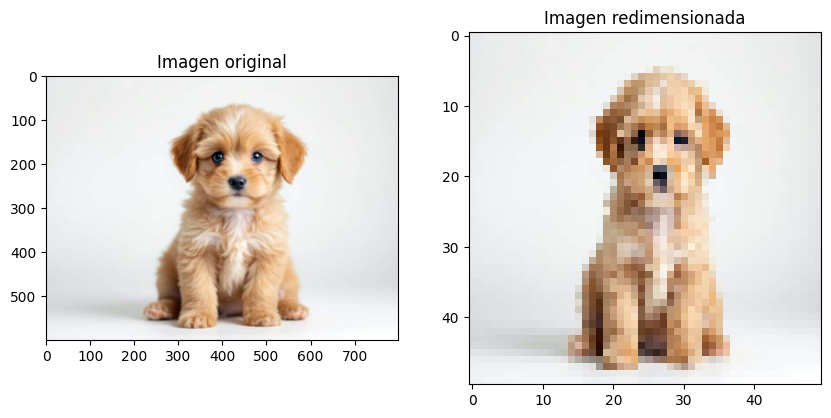

Procesando imagen: close-up-dog-sitting-white-background.jpg (Clase: perro)
  [!] Error: No se pudo leer 'dachshund-8-meses-sentado_191971-4028.avif'. Saltando...
Procesando imagen: david-lezcano-m-Doa-GTrUw-unsplash.jpg (Clase: perro)
Procesando imagen: depositphotos_10886131-stock-photo-old-english-sheepdog-1-year.jpg (Clase: perro)
Procesando imagen: depositphotos_167728872-stock-photo-siberian-husky-puppy-isolated-on.jpg (Clase: perro)
Procesando imagen: depositphotos_321288510-stock-photo-dog-jack-russell-terrier-sitting.jpg (Clase: perro)
Procesando imagen: descargar.webp (Clase: perro)
Procesando imagen: dog-sticking-out-his-tongue-looking-photographer.jpg (Clase: perro)
Procesando imagen: dog.10.jpg (Clase: perro)
Procesando imagen: dog.1004.jpg (Clase: perro)
Procesando imagen: dog.1009.jpg (Clase: perro)
Procesando imagen: dog.101.jpg (Clase: perro)
Procesando imagen: dog.1026.jpg (Clase: perro)
Procesando imagen: dog.1044.jpg (Clase: perro)
Procesando imagen: dog.4009.jpg (C

In [4]:
ruta_path = './DatasetPerrosGatos'
# Directorio que contiene las carpetas de perros y gatos
data_folder = ruta_path

# Carpeta para guardar las imágenes redimensionadas
output_folder = './DatasetRedimensionado'

# Cargar y etiquetar las imágenes y guardar las imágenes redimensionadas
X, y = load_and_label_data(data_folder, output_folder)

ruta_save_dataset='datos_etiquetados_21_02_26.pickle'
# Guardar los datos etiquetados
with open(ruta_save_dataset, 'wb') as handle:
    pickle.dump((X, y), handle, protocol=pickle.HIGHEST_PROTOCOL)
print("Datos etiquetados guardados correctamente.")

# Dividir datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # random_state s la semilla por la que se serpara 

# Ahora X_train, X_test, y_train, y_test están listos para ser utilizados en el entrenamiento de tu modelo


# Entrenamiento Red Neuronal: 

Proponer una arquitecturar, compilar y entrenar


In [5]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Normalizar los datos de las imágenes
X = X.astype('float32') / 255.0

# Convertir etiquetas a one-hot encoding
y = to_categorical(y, 2)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Aplanar las imágenes para el MLP
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

In [6]:
# Construir el modelo MLP ORIGINAL
''' model_mlp = Sequential([
Flatten(input_shape=(500*500*3,)),
Dense(512, activation='relu'),
Dense(2, activation='softmax')
])

model_mlp.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

# Entrenar el modelo
history_mlp = model_mlp.fit(X_train_flat, y_train, epochs=10, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=3)]) '''

" model_mlp = Sequential([\nFlatten(input_shape=(500*500*3,)),\nDense(512, activation='relu'),\nDense(2, activation='softmax')\n])\n\nmodel_mlp.compile(optimizer='adam',\nloss='categorical_crossentropy',\nmetrics=['accuracy'])\n\n# Entrenar el modelo\nhistory_mlp = model_mlp.fit(X_train_flat, y_train, epochs=10, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=3)]) "

In [7]:
'''import matplotlib.pyplot as plt
import numpy as np

# Extraer los datos del historial
loss = history_mlp.history['accuracy']
val_loss = history_mlp.history['val_accuracy']
epochs = np.arange(1, len(loss) + 1)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'bo-', label='Pérdida de entrenamiento')
plt.plot(epochs, val_loss, 'ro-', label='Pérdida de validación')

plt.title('Historial de Presicion (Accuracy)')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()'''

"import matplotlib.pyplot as plt\nimport numpy as np\n\n# Extraer los datos del historial\nloss = history_mlp.history['accuracy']\nval_loss = history_mlp.history['val_accuracy']\nepochs = np.arange(1, len(loss) + 1)\n\n# Crear la gráfica\nplt.figure(figsize=(10, 6))\nplt.plot(epochs, loss, 'bo-', label='Pérdida de entrenamiento')\nplt.plot(epochs, val_loss, 'ro-', label='Pérdida de validación')\n\nplt.title('Historial de Presicion (Accuracy)')\nplt.xlabel('Épocas')\nplt.ylabel('Loss')\nplt.legend()\nplt.grid(True)\nplt.show()"

## Modelo 2 
Este fue el model que se saco cacharreando!!!

In [8]:
# Construir el modelo MLP VERSION QUE HICIMOS
model_version2 = Sequential([
Flatten(input_shape=(50*50*3,)),
Dense(1024, activation='relu'),
Dense(2048, activation='relu'),
Dense(2048, activation='relu'),
Dense(1024, activation='relu'),

Dense(2, activation='softmax')
]) 

model_version2.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

# Entrenar el modelo
history_version2 = model_version2.fit(X_train_flat, y_train, epochs=30, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

Epoch 1/30


c:\Users\814KQ54\Documents\clasificacionPerrosGatos\_env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - accuracy: 0.5577 - loss: 7.7121 - val_accuracy: 0.5000 - val_loss: 5.0675
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.4423 - loss: 6.7168 - val_accuracy: 0.5000 - val_loss: 1.5491
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.5192 - loss: 2.3998 - val_accuracy: 0.5000 - val_loss: 0.7493
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.4423 - loss: 1.4396 - val_accuracy: 0.5000 - val_loss: 2.2891
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.6346 - loss: 1.4280 - val_accuracy: 0.5000 - val_loss: 0.7495
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.3654 - loss: 0.8567 - val_accuracy: 0.5000 - val_loss: 0.8255
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.6346 - loss: 0.6650 - val_accuracy: 0.5000 - val_loss: 0.8271
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.6538 - loss: 0.6957 - val_accuracy: 0.5000 - val_loss: 0.7248
Epoch 9/30

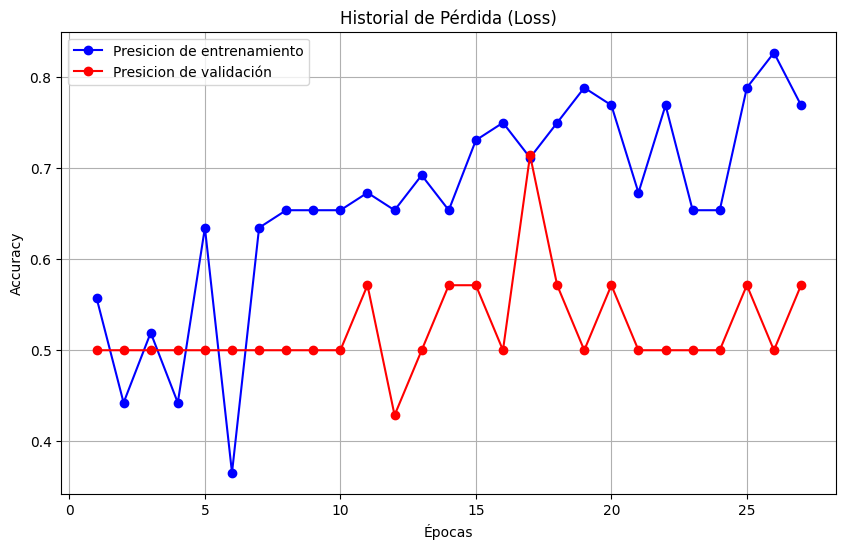

In [9]:
# Extraer los datos del historial
loss = history_version2.history['accuracy']
val_loss = history_version2.history['val_accuracy']
epochs = np.arange(1, len(loss) + 1)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'bo-', label='Presicion de entrenamiento')
plt.plot(epochs, val_loss, 'ro-', label='Presicion de validación')

plt.title('Historial de Pérdida (Loss)')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Aumento de Datos

In [10]:

# Función para aplicar aumentos de datos a una imagen y guardarlas en el mismo directorio
def apply_augmentations_and_save(img, output_folder, filename):
    # Guardar imagen original
    cv2.imwrite(os.path.join(output_folder, f"original_{filename}"), cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

    # Rotar 90 grados y guardar
    rotated_90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    cv2.imwrite(os.path.join(output_folder, f"rotated_90_{filename}"), cv2.cvtColor(rotated_90, cv2.COLOR_RGB2BGR))

    # Rotar 180 grados y guardar
    rotated_180 = cv2.rotate(img, cv2.ROTATE_180)
    cv2.imwrite(os.path.join(output_folder, f"rotated_180_{filename}"), cv2.cvtColor(rotated_180, cv2.COLOR_RGB2BGR))

    # Invertir y guardar
    #inverted = cv2.flip(img, -1)
    #cv2.imwrite(os.path.join(output_folder, f"inverted_{filename}"), cv2.cvtColor(inverted, cv2.COLOR_RGB2BGR))

    # Aumento de brillo y guardar
    ##brightened = cv2.convertScaleAbs(img, alpha=1.5, beta=50)
    ##cv2.imwrite(os.path.join(output_folder, f"brightened_{filename}"), cv2.cvtColor(brightened, cv2.COLOR_RGB2BGR))

    # Modo espejo y guardar
    mirrored = cv2.flip(img, 1)
    cv2.imwrite(os.path.join(output_folder, f"mirrored_{filename}"), cv2.cvtColor(mirrored, cv2.COLOR_RGB2BGR))

# Directorio que contiene las carpetas de perros y gatos
data_folder = './DatasetRedimensionado/'

# Carpeta para guardar las imágenes aumentadas manualmente
output_folder_manual = './DatasetRedimensionadoAumentado'

# Crear carpeta de salida si no existe
if not os.path.exists(output_folder_manual):
    os.makedirs(output_folder_manual)

# Iterar sobre las carpetas de clases
for class_folder in os.listdir(data_folder):
    class_path = os.path.join(data_folder, class_folder)
    output_class_folder = os.path.join(output_folder_manual, class_folder)
    if not os.path.exists(output_class_folder):
        os.makedirs(output_class_folder)
    # Iterar sobre las imágenes en la carpeta de clase
    for filename in os.listdir(class_path):
        img = cv2.imread(os.path.join(class_path, filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # Aplicar aumentos de datos y guardar las imágenes aumentadas en la carpeta de clase correspondiente
        apply_augmentations_and_save(img, output_class_folder, filename)

print("Aumento de datos manual completado.")

Aumento de datos manual completado.


In [11]:
# Función para cargar y etiquetar imágenes
from typing import Any


def load_and_label_data_aumentado(folder):
    images = []
    labels = []
    for label, class_folder in enumerate[Any](os.listdir(folder)):
        class_path = os.path.join(folder, class_folder)
                  
        
        for i, filename in enumerate(os.listdir(class_path)):
            img = cv2.imread(os.path.join(class_path, filename))

            if img is None:
                print(f"  [!] Error: No se pudo leer '{filename}'. Saltando...")
                continue

            images.append(img)
            labels.append(label)  # Usar el índice de la clase como etiqueta

    print("Carga y etiquetado completados.")
    return np.array(images), np.array(labels)

In [12]:
data_aumentado = './DatasetRedimensionadoAumentado'
# Cargar y etiquetar las imágenes y guardar las imágenes redimensionadas
X_a, y_a = load_and_label_data_aumentado(data_aumentado)

ruta_save_dataset='datos_etiquetados_21_02_26_aumentado.pickle'
# Guardar los datos etiquetados
with open(ruta_save_dataset, 'wb') as handle:
    pickle.dump((X_a, y_a), handle, protocol=pickle.HIGHEST_PROTOCOL)
print("Datos etiquetados guardados correctamente.")

Carga y etiquetado completados.
Datos etiquetados guardados correctamente.


## Modelo con Datos aumentados

In [13]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Normalizar los datos de las imágenes
X_a = X_a.astype('float32') / 255.0

# Convertir etiquetas a one-hot encoding
y_a = to_categorical(y_a, 2)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_a_train, X_a_test, y_a_train, y_a_test = train_test_split(X_a, y_a, test_size=0.2, random_state=42)


# Aplanar las imágenes para el MLP
X_train_flat_a = X_a_train.reshape((X_a_train.shape[0], -1))
X_test_flat_a = X_a_test.reshape((X_a_test.shape[0], -1))

In [14]:
# Construir el modelo MLP VERSION QUE HICIMOS
model_version3 = Sequential([
Flatten(input_shape=(50*50*3,)),
Dense(1024, activation='relu'),
Dense(2048, activation='relu'),
Dense(2048, activation='relu'),
Dense(1024, activation='relu'),

Dense(2, activation='softmax')
]) 

model_version3.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

# Entrenar el modelo
history_version3 = model_version3.fit(X_train_flat_a, y_a_train, epochs=30, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.4623 - loss: 8.0425 - val_accuracy: 0.4528 - val_loss: 0.7094
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4057 - loss: 0.9024 - val_accuracy: 0.5472 - val_loss: 0.7927
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5377 - loss: 0.7054 - val_accuracy: 0.5472 - val_loss: 0.7117
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5189 - loss: 0.6838 - val_accuracy: 0.5472 - val_loss: 0.8572
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5755 - loss: 0.7082 - val_accuracy: 0.5472 - val_loss: 0.7311
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5660 - loss: 0.6746 - val_accuracy: 0.5472 - val_loss: 0.7264
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5755 - loss: 0.6881 - val_accuracy: 0.5472 - val_loss: 0.8091
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5094 - loss: 0.7296 - val_accuracy: 0.5472 - val_loss: 0.7516


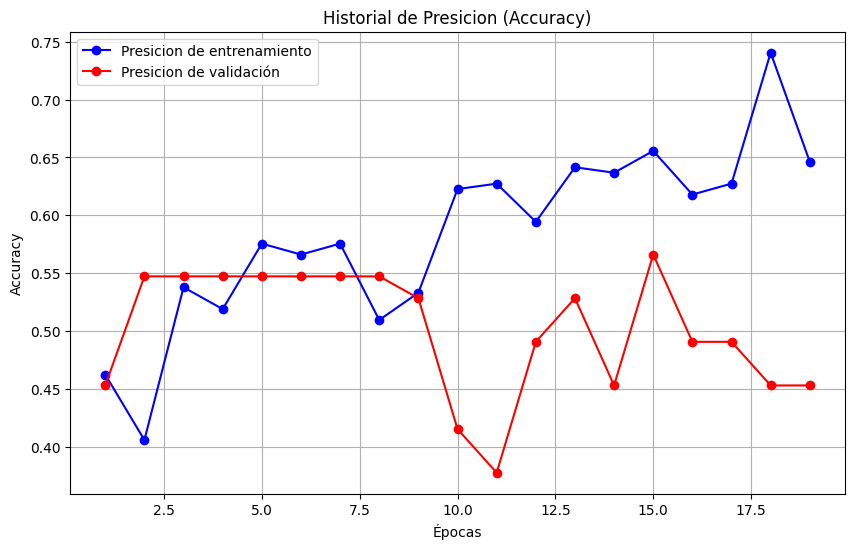

In [15]:
# Extraer los datos del historial
accuracy = history_version3.history['accuracy']
val_accuracy = history_version3.history['val_accuracy']
epochs = np.arange(1, len(accuracy) + 1)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, 'bo-', label='Presicion de entrenamiento')
plt.plot(epochs, val_accuracy, 'ro-', label='Presicion de validación')

plt.title('Historial de Presicion (Accuracy)')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Comparacion entre modelo con datos aumentados y modelos con datos sin aumentar 

Modelo 2 (con datos normales) y modelo 3 (con datos aumentados) 


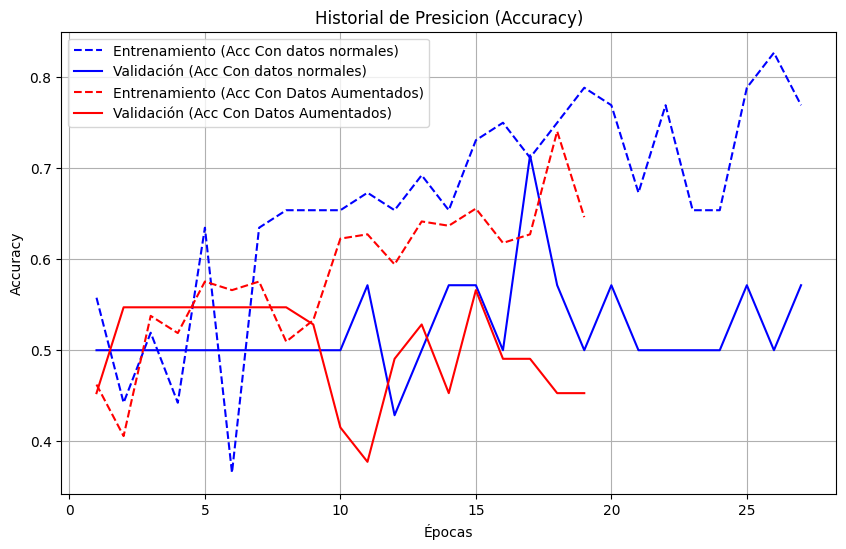

In [16]:
# Extraer los datos del historial
accuracy2 = history_version2.history['accuracy']
accuracy3 = history_version3.history['accuracy']

val_accuracy2 = history_version2.history['val_accuracy']
val_accuracy3 = history_version3.history['val_accuracy']

epochs2 = np.arange(1, len(accuracy2) + 1)
epochs3 = np.arange(1, len(accuracy3) + 1)

# Crear la gráfica
plt.figure(figsize=(10, 6))
# Graficar (Version 2) - Líneas punteadas
plt.plot(epochs2, accuracy2, 'b--', label='Entrenamiento (Acc Con datos normales)')
plt.plot(epochs2, val_accuracy2, 'b-', label='Validación (Acc Con datos normales)')

# Graficar (Version 3) - Líneas continuas más gruesas
plt.plot(epochs3, accuracy3, 'r--', label='Entrenamiento (Acc Con Datos Aumentados)')
plt.plot(epochs3, val_accuracy3, 'r-', label='Validación (Acc Con Datos Aumentados)')

plt.title('Historial de Presicion (Accuracy)')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# Red Neuronal Convulsional (CNN)

In [25]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Construir el modelo CNN
model_cnn = Sequential([
Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)),
MaxPooling2D((2, 2)),
Flatten(),
Dense(16, activation='relu'),
Dense(2, activation='softmax')
])

model_cnn.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

# Entrenar el modelo
history_cnn = model_cnn.fit(X_a_train, y_a_train, epochs=50, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4717 - loss: 1.0406 - val_accuracy: 0.5472 - val_loss: 0.7120
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5708 - loss: 0.7702 - val_accuracy: 0.5472 - val_loss: 0.7443
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6085 - loss: 0.6838 - val_accuracy: 0.5283 - val_loss: 0.6836
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6604 - loss: 0.6736 - val_accuracy: 0.4340 - val_loss: 0.6744
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6415 - loss: 0.6524 - val_accuracy: 0.4717 - val_loss: 0.6752
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7170 - loss: 0.6348 - val_accuracy: 0.5094 - val_loss: 0.6871
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7170 - loss: 0.6146 - val_accuracy: 0.4717 - val_loss: 0.6884
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7925 - loss: 0.5830 - val_accuracy: 0.5283 - val_loss: 0.7066
Ep

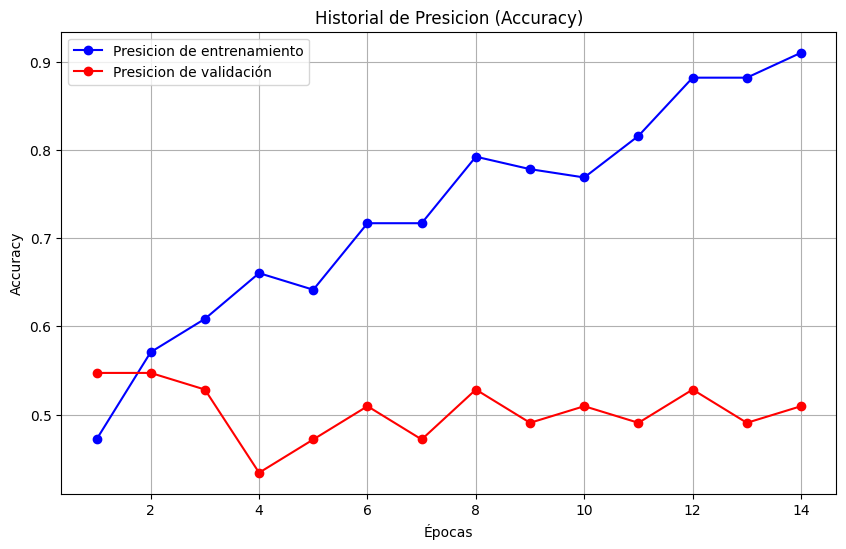

In [26]:
# Extraer los datos del historial
accuracy = history_cnn.history['accuracy']
val_accuracy = history_cnn.history['val_accuracy']
epochs = np.arange(1, len(accuracy) + 1)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, 'bo-', label='Presicion de entrenamiento')
plt.plot(epochs, val_accuracy, 'ro-', label='Presicion de validación')

plt.title('Historial de Presicion (Accuracy)')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()